In [1]:
%run ../src/apriori-lib.py
%run ../src/apriori-testing-v8.py

In [2]:
# -*- coding: utf-8 -*-

import os
import numpy as np
import pandas as pd
from random import sample 
import matplotlib.pyplot as plt

In [3]:
# load the pagecategory view events
trans = pd.read_csv('../data/order_after_preprocess.csv') 
# trans.columns = ['user','item']
# print(trans.item.nunique()) # show the number of vroots
trans.head()

trans['line_items_sku'] = trans['line_items.sku'].apply(str)
allitems = np.unique(trans.line_items_sku); print (len(allitems)) # get the distinct items title


119


In [4]:
baskets = trans.groupby('customer.id')['line_items.sku'].apply(list)  # convert transactions into baskets (a series of lists)
print(baskets[0:30])
baskets

Series([], Name: line_items.sku, dtype: object)


customer.id
6.552711e+09                           [CVL-DCW-BLK, M80-SAD-ASH]
6.552712e+09    [PFX-PB-M-BLK-BDL, PFX-PB-M-SLV-BDL, PFX-PB-M-...
6.552716e+09                         [M80-CY22-BLK, PFX-PB-M-SLV]
6.552716e+09    [M80-VEG-BLK, M80-VHB-BLK, M80-VEG-GRY, M80-VH...
6.552716e+09    [M80-EG-BLK, M80-AC-BLK, M80-VHB-BLK, M80-SEB-...
                                      ...                        
5.053273e+12                                         [M80-2B-BLK]
5.053724e+12                                    [M80-FLY-ULT-BLK]
5.054049e+12                                    [M80-TOUR-V2-BLK]
5.054276e+12                                      [M80-BTY-ASH-S]
5.054629e+12                                    [M80-FLY-ULT-BLK]
Name: line_items.sku, Length: 3805, dtype: object

In [5]:
min_item_in_baskets = 2
indexes = list(baskets.index)
for i in indexes:    
    if (len(baskets[i]) < min_item_in_baskets):
        baskets = baskets.drop(labels=i)
        # print(len(baskets[i]), baskets[i], i)
baskets

customer.id
6.552711e+09                           [CVL-DCW-BLK, M80-SAD-ASH]
6.552712e+09    [PFX-PB-M-BLK-BDL, PFX-PB-M-SLV-BDL, PFX-PB-M-...
6.552716e+09                         [M80-CY22-BLK, PFX-PB-M-SLV]
6.552716e+09    [M80-VEG-BLK, M80-VHB-BLK, M80-VEG-GRY, M80-VH...
6.552716e+09    [M80-EG-BLK, M80-AC-BLK, M80-VHB-BLK, M80-SEB-...
                                      ...                        
5.040410e+12                     [M80-TICK-V2-BLK, M80-BTY-BLK-L]
5.040438e+12                   [PFX-PB-ACC-KIT, PFX-PB-L-BLK-BDL]
5.042806e+12                          [M80-STEB-BLK, M80-SEB-ASH]
5.047406e+12                     [M80-TICK-V2-GRY, PFX-PB-LT-BLK]
5.052595e+12        [PFX-PB-LT-BLK, M80-TICK-V2-BLK, M80-VHB-BLK]
Name: line_items.sku, Length: 961, dtype: object

['M80-TICK-V2-BLK', 'M80-VEG-BLK', 'M80-EG-BLK', 'EFX-FLY-BLK', 'M80-2G-BLK', 'M80-VHB-BLK', 'M80-TOUR-V2-BLK', 'M80-VEB-BLK', 'M80-CLUB-V2-BLK', 'M80-BTY-BLK-L', 'M80-SEG-BLK', 'M80-EB-BLK', 'M80-AD-BLK', 'M80-VAD-BLK', 'M80-2B-BLK', 'M80-BTY-BLK-S', 'M80-SEB-BLK', 'M80-SEG-ASH', 'M80-2A-BLK', 'M80-AC-BLK']


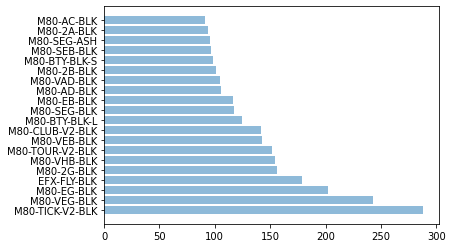

In [6]:
# do some simple data visualisation/data exploration
itemfreqcnts = itemcounts(baskets) # count item frequencies
sorted(itemfreqcnts.items(), key=lambda kv: kv[1], reverse=True) # reverse sort by frequency

# display as histogram
rankeditems = [k for k,v in sorted(itemfreqcnts.items(), key=lambda kv: kv[1], reverse=True)]
frequencies = [v for k,v in sorted(itemfreqcnts.items(), key=lambda kv: kv[1], reverse=True)]
topN=20
plt.barh(rankeditems[0:topN], frequencies[0:topN], align='center', alpha=0.5)
print(rankeditems[0:topN])

In [7]:
# build a set of association rules, experiment using different support and confidence parameters
freqItemSet, rules = apriori(baskets, minSup=0.2, minConf=0.2); print(len(rules)) #
freqItemSet, rules = apriori(baskets, minSup=0.1, minConf=0.1); print(len(rules)) #
freqItemSet, rules = apriori(baskets, minSup=0.01, minConf=0.1); print(len(rules)) # 

0
0
47603


In [8]:
# examine the top rules and determine the number of unique items that the rules can recommend (target)
# print(rules[0:10])
showrules(rules, N=50)
ruleRHSitems = RHSitems(rules); print(len(ruleRHSitems))
ruleRHSitems # show each unqiue targeted item and number of rules that recommend that item

1.00 	 {'M80-VEG-BLK'} <=	 {'M80-BTY-BLK-L', 'M80-2A-BLK'}
1.00 	 {'M80-VEB-BLK'} <=	 {'M80-AC-BLK', 'M80-K61-BLK'}
1.00 	 {'M80-VEG-BLK'} <=	 {'M80-EG-BLK', 'M80-SN-BLK'}
1.00 	 {'M80-BTY-BLK-L'} <=	 {'M80-VEG-BLK', 'M80-BTY-ASH-S'}
1.00 	 {'M80-VEG-BLK'} <=	 {'PFX-PB-S-BLK', 'M80-VHB-BLK'}
1.00 	 {'M80-VEG-BLK'} <=	 {'M80-VEG-GRY', 'M80-SEB-ASH'}
1.00 	 {'M80-EG-BLK'} <=	 {'M80-SEB-ASH', 'M80-VAD-BLK'}
1.00 	 {'M80-VEB-BLK'} <=	 {'M80-2A-BLK', 'M80-VEB-GRY'}
1.00 	 {'M80-VEG-BLK'} <=	 {'M80-AC-BLK', 'M80-K61-BLK'}
1.00 	 {'M80-EG-BLK'} <=	 {'M80-TICK-V2-GRY', 'M80-BTY-BLK-S'}
1.00 	 {'M80-VEB-BLK'} <=	 {'M80-2B-BLK', 'M80-VAD-BLK'}
1.00 	 {'M80-VEG-BLK'} <=	 {'M80-CLUB-V2-BLK', 'M80-VEG-GRY'}
1.00 	 {'M80-VEG-BLK'} <=	 {'M80-TICK-V2-BLK', 'M80-SEB-ASH'}
1.00 	 {'M80-VEG-BLK'} <=	 {'M80-BTY-BLK-S', 'M80-VHB-BLK'}
1.00 	 {'M80-VAD-BLK'} <=	 {'M80-BTY-BLK-L', 'M80-2A-BLK'}
1.00 	 {'M80-VEG-BLK'} <=	 {'M80-CY24-ASH', 'M80-VHB-BLK'}
1.00 	 {'M80-VEB-BLK'} <=	 {'M80-VAD-BLK', 'M80-K61-BLK'

{'M80-VEG-BLK': 15457,
 'M80-VEB-BLK': 6166,
 'M80-BTY-BLK-L': 2947,
 'M80-EG-BLK': 12707,
 'M80-VAD-BLK': 4815,
 'M80-2G-BLK': 12807,
 'M80-SEG-ASH': 10304,
 'M80-2B-BLK': 4051,
 'M80-VHB-BLK': 12254,
 'M80-SEB-BLK': 3576,
 'M80-VEB-GRY': 3484,
 'M80-SEB-ASH': 4838,
 'M80-SEG-BLK': 4224,
 'M80-BTY-BLK-S': 419,
 'M80-VEG-GRY': 3178,
 'M80-TOUR-V2-BLK': 1221,
 'M80-K61-BLK': 3463,
 'M80-TICK-V2-BLK': 1464,
 'M80-SAD-ASH': 499,
 'M80-PRO-V2-BLK': 4,
 'M80-AD-BLK': 284,
 'M80-BTY-ASH-L': 108,
 'M80-2A-BLK': 1690,
 'M80-CLUB-V2-BLK': 737,
 'M80-TICK-V2-GRY': 50,
 'M80-AC-BLK': 857,
 'EFX-FLY-BLK': 1467,
 'M80-EB-BLK': 202,
 'M80-WAR-BLK': 11,
 'M80-CY22-ASH': 4,
 'M80-DLT-BLK': 5,
 'M80-SAD-BLK': 28,
 'PFX-PB-ACC-KIT': 1,
 'M80-WAR-GRY': 1,
 'M80-CY22-BLK': 32,
 'M80-BTY-ASH-S': 26,
 'PFX-PB-L-BLK': 1,
 'PFX-PB-LT-BLK': 14,
 'PFX-PB-M-BLK': 5,
 'M80-SN-BLK': 10,
 'M80-ST-ASH': 1,
 'M80-SS-BLK': 2,
 'M80-CY24-BLK': 3,
 'M80-DLT-GRY': 1,
 'PFX-PB-S-BLK': 4,
 'PFX-PB-S-SLV': 1,
 'M80-CY24-ASH

In [9]:
# to test the rules we first divide the baskets into training and test sets and then rebuild the ruleset
testsize = int(len(baskets)*0.1); testsize # set the size of the test set
testids  = sample(list(baskets.index),testsize)
trainids = list(set(baskets.index) - set(testids))
trainbaskets = baskets[trainids]
testbaskets  = baskets[testids]

# rebuild the ruleset using the training baskest only
freqItemSet, rules = apriori(trainbaskets, minSup=0.01, minConf=0.1); len(rules) 

136881

In [10]:
# make recommendations for one basket (e.g. for one user at basket checkout time)
testbasket = testbaskets.iloc[1]; print(testbasket)
execrules_anymatch(testbasket, rules) # allows any subset of the testbasket to match a rule LHS

['EFX-FLY-BLK', 'CVL-DCW-BLK', 'CVL-PPW-BLK']


[('M80-VEG-BLK', 0.2777777777777778),
 ('M80-2G-BLK', 0.23148148148148148),
 ('M80-VHB-BLK', 0.21296296296296297),
 ('M80-TICK-V2-BLK', 0.2037037037037037),
 ('M80-EG-BLK', 0.19444444444444445),
 ('M80-CLUB-V2-BLK', 0.17592592592592593),
 ('M80-SEG-BLK', 0.1574074074074074),
 ('M80-2B-BLK', 0.1574074074074074),
 ('M80-VEB-BLK', 0.1574074074074074),
 ('M80-BTY-BLK-L', 0.1574074074074074)]

In [11]:
_ = rulehits_holdout_lift(testbaskets, rules, allitems, topN=3, tpb=5)

#holdbacks= 248 recitems= 724 hits= 68 (9.39%) randrecitems= 724 randhits= 2 (0.28%) rulelift=34.00


In [12]:
_ = rulehits_holdout_lift(testbaskets, rules, allitems, topN=5, tpb=5)

#holdbacks= 248 recitems= 1189 hits= 78 (6.56%) randrecitems= 1189 randhits= 10 (0.84%) rulelift=7.80


In [13]:
_ = rulehits_holdout_lift(testbaskets, rules, allitems, topN=7, tpb=5)

#holdbacks= 248 recitems= 1626 hits= 88 (5.41%) randrecitems= 1626 randhits= 9 (0.55%) rulelift=9.78


In [14]:
_ = rulehits_holdout_lift(testbaskets, rules, allitems, topN=3, tpb=7)

#holdbacks= 270 recitems= 790 hits= 69 (8.73%) randrecitems= 790 randhits= 4 (0.51%) rulelift=17.25


In [15]:
_ = rulehits_holdout_lift(testbaskets, rules, allitems, topN=3, tpb=5)

#holdbacks= 248 recitems= 724 hits= 68 (9.39%) randrecitems= 724 randhits= 3 (0.41%) rulelift=22.67
